# Lang compositional analysis

In [22]:
import warnings

warnings.filterwarnings("ignore")

In [23]:
from pathlib import Path
import sys

sys.path.insert(1, str(Path().cwd().parent))
import common_config

In [24]:
common_config.figure_journal_basic()

In [25]:
import pertpy as pt
import scanpy as sc
import numpy as np
import matplotlib.pyplot as plt

In [26]:
adata = sc.read_h5ad("lang_immune.h5ad")

In [27]:
adata

AnnData object with n_obs × n_vars = 24672 × 17343
    obs: 'condition', 'modality', 'patient', 'treatment', 'identifier', 'n_counts', 'n_genes', 'percent_mito', 'QC_group', 'doublet_scores', 'size_factors', 'leiden_1', 'leiden_2', 'cell_type', 'cell_type_group', 'sample'
    var: 'n_cells', 'n_counts', 'means', 'dispersions', 'dispersions_norm', 'highly_variable', 'highly_variable_nbatches', 'highly_variable_intersection'
    uns: 'QC_group_colors', 'cell_type_colors', 'cell_type_group_colors', 'condition_colors', 'dendrogram_cell_type', 'hvg', 'identifier_colors', 'leiden', 'leiden_1_colors', 'leiden_2_colors', 'modality_colors', 'name_colors', 'neighbors', 'patient_colors', 'pca', 'rank_genes_groups', 'sample_colors', 'timepoint_colors', 'treatment_colors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'counts', 'unsouped_counts'
    obsp: 'connectivities', 'distances'

In [28]:
adata.obs

,condition,modality,patient,treatment,identifier,n_counts,n_genes,percent_mito,QC_group,doublet_scores,size_factors,leiden_1,leiden_2,cell_type,cell_type_group,sample
muc31175_AAACCCAAGATCCCGC,Fibrotic Cocktail,PCLS,2,FC,muc31175,735.0,481,0.073469,low,0.051087,0.101679,0,7,T cells,T cells,FC_2
muc31175_AAACCCACAAGTTGGG,Fibrotic Cocktail,PCLS,2,FC,muc31175,1304.0,773,0.007669,low,0.027234,0.188760,1,0,Mast cells,Mast cells,FC_2
muc31175_AAACCCACACCAAAGG,Fibrotic Cocktail,PCLS,2,FC,muc31175,1986.0,1118,0.043807,low,0.164641,0.300193,1,0,Mast cells,Mast cells,FC_2
muc31175_AAACCCACACCTCGTT,Fibrotic Cocktail,PCLS,2,FC,muc31175,2049.0,986,0.060517,low,0.138672,0.283763,21,33,B cells,B cells,FC_2
muc31175_AAACCCACAGTTAAAG,Fibrotic Cocktail,PCLS,2,FC,muc31175,893.0,590,0.092945,low,0.076000,0.140051,0,15,T cells,T cells,FC_2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
muc24279_TTTCGATGTCGCATTA,Fibrotic Cocktail,PCLS,1,FC,muc24279,4219.0,1958,0.053567,medium,0.036496,0.697467,19,20,Mast cells,Mast cells,FC_1
muc24279_TTTGACTCAAAGCACG,Fibrotic Cocktail,PCLS,1,FC,muc24279,10049.0,3135,0.060902,medium,0.042802,1.331794,5,17,Macrophages,Macrophages,FC_1
muc24279_TTTGACTGTAACATAG,Fibrotic Cocktail,PCLS,1,FC,muc24279,606.0,384,0.008251,medium,0.071547,0.064517,18,17,Macrophages,Macrophages,FC_1
muc24279_TTTGATCCAATTGAGA,Fibrotic Cocktail,PCLS,1,FC,muc24279,1933.0,879,0.026901,medium,0.025974,0.251617,12,13,T cells,T cells,FC_1


## scCODA

In [29]:
sccoda_model = pt.tl.Sccoda()
sccoda_data = sccoda_model.load(
    adata,
    type="cell_level",
    generate_sample_level=True,
    cell_type_identifier="cell_type",
    sample_identifier="sample",
    covariate_obs=["treatment"],
)

In [30]:
sccoda_data

MuData object with n_obs × n_vars = 24680 × 17350
  var:	'n_cells'
  2 modalities
    rna:	24672 x 17343
      obs:	'condition', 'modality', 'patient', 'treatment', 'identifier', 'n_counts', 'n_genes', 'percent_mito', 'QC_group', 'doublet_scores', 'size_factors', 'leiden_1', 'leiden_2', 'cell_type', 'cell_type_group', 'sample'
      var:	'n_cells', 'n_counts', 'means', 'dispersions', 'dispersions_norm', 'highly_variable', 'highly_variable_nbatches', 'highly_variable_intersection'
      uns:	'QC_group_colors', 'cell_type_colors', 'cell_type_group_colors', 'condition_colors', 'dendrogram_cell_type', 'hvg', 'identifier_colors', 'leiden', 'leiden_1_colors', 'leiden_2_colors', 'modality_colors', 'name_colors', 'neighbors', 'patient_colors', 'pca', 'rank_genes_groups', 'sample_colors', 'timepoint_colors', 'treatment_colors', 'umap'
      obsm:	'X_pca', 'X_umap'
      varm:	'PCs'
      layers:	'counts', 'unsouped_counts'
      obsp:	'connectivities', 'distances'
    coda:	8 x 7
      obs:	'condition', 'modality', 'patient', 'treatment'
      var:	'n_cells'

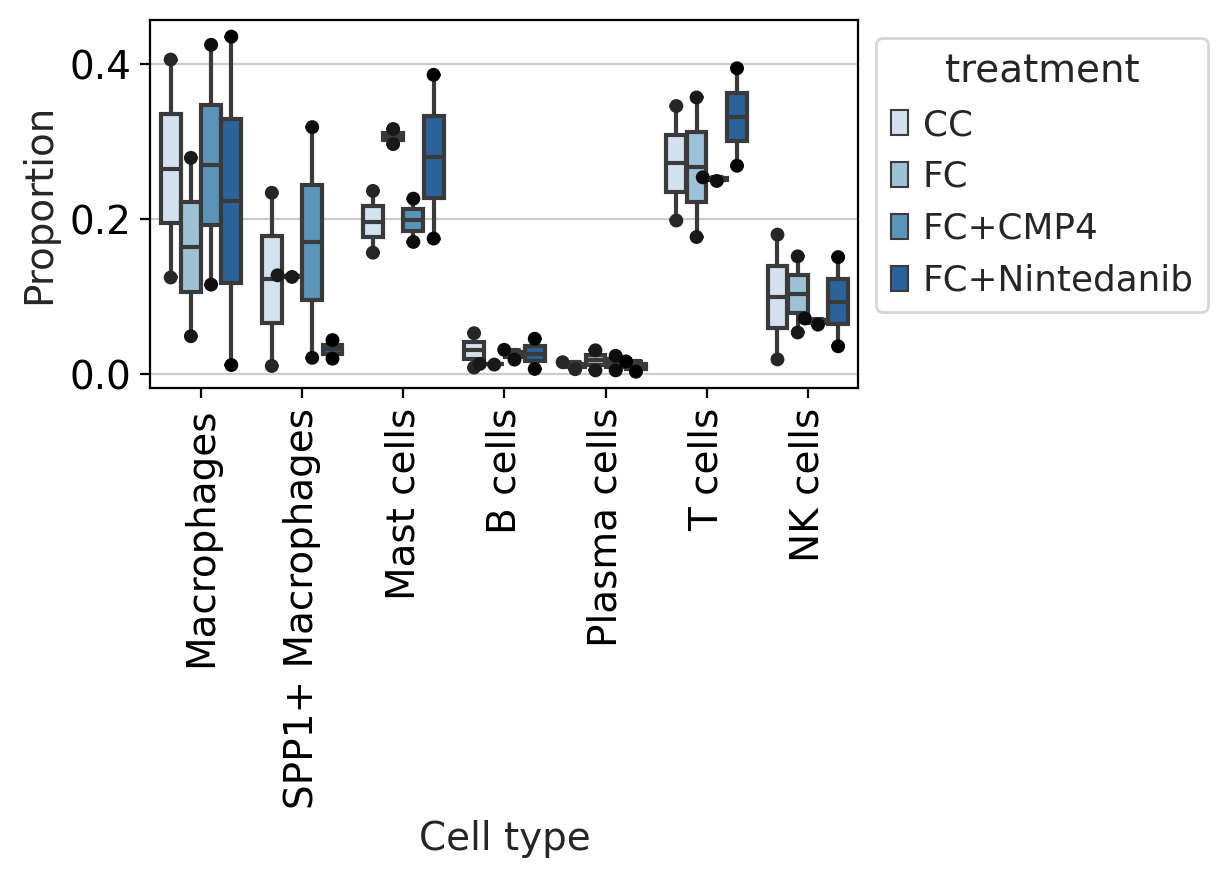

In [32]:
palette = {
    "Control Cocktail": common_config.pt_blue,
    "Fibrotic Cocktail": common_config.pt_orange,
    "Fibrotic Cocktail + Treatment": common_config.pt_red,
}

sccoda_model.plot_boxplots(
    sccoda_data,
    modality_key="coda",
    feature_name="treatment",
    add_dots=True,
   # cmap=palette,
)
fig = plt.gcf()
fig.set_size_inches(12, 6)
plt.savefig("figures/compositional_boxplot_umap.png", bbox_inches="tight")

In [33]:
sccoda_data = sccoda_model.prepare(
    sccoda_data,
    modality_key="coda",
    formula="treatment",
    reference_cell_type="automatic",
)

Automatic reference selection! Reference cell type set to Plasma cells

In [34]:
sccoda_model.run_nuts(sccoda_data, modality_key="coda")

sample: 100%|██████████| 11000/11000 [00:49<00:00, 222.99it/s, 127 steps of size 3.80e-02. acc. prob=0.80]


In [41]:
sccoda_model.set_fdr(sccoda_data, modality_key="coda", est_fdr=0.5)
sccoda_model.summary(sccoda_data, modality_key="coda")

                                          Compositional Analysis summary                                           
┌──────────────────────────────────────────────┬──────────────────────────────────────────────────────────────────┐
│ Name                                         │ Value                                                            │
├──────────────────────────────────────────────┼──────────────────────────────────────────────────────────────────┤
│ Data                                         │ Data: 8 samples, 7 cell types                                    │
│ Reference cell type                          │ Plasma cells                                                     │
│ Formula                                      │ treatment                                                        │
└──────────────────────────────────────────────┴──────────────────────────────────────────────────────────────────┘

┌─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┐
│ Intercepts                                                                                                      │
├─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┤
│                    Final Parameter  Expected Sample                                                             │
│ Cell Type                                                                                                       │
│ Macrophages             0.857          549.933                                                                  │
│ SPP1+ Macrophages       0.194          283.382                                                                  │
│ Mast cells              1.217          788.235                                                                  │
│ B cells                -0.516          139.323                                                                  │
│ Plasma cells           -0.774          107.640                                                                  │
│ T cells                 1.359          908.502                                                                  │
│ NK cells                0.274          306.984                                                                  │
└─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┘

┌─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┐
│ Effects                                                                                                         │
├─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┤
│                                             Final Parameter  Expected Sample  log2-fold change                  │
│ Covariate                Cell Type                                                                              │
│ treatmentT.FC            Macrophages             0.000          517.961            -0.086                       │
│                          SPP1+ Macrophages       0.192          323.497             0.191                       │
│                          Mast cells              0.146          859.486             0.125                       │
│                          B cells                -0.072          122.126            -0.190                       │
│                          Plasma cells            0.000          101.382            -0.086                       │
│                          T cells                 0.000          855.683            -0.086                       │
│                          NK cells                0.050          303.866            -0.015                       │
│ treatmentT.FC+CMP4       Macrophages             0.134          610.292             0.150                       │
│                          SPP1+ Macrophages       0.039          286.005             0.013                       │
│                          Mast cells              0.000          764.899            -0.043                       │
│                          B cells                 0.027          138.851            -0.005                       │
│                          Plasma cells            0.000          104.454            -0.043                       │
│                          T cells                 0.000          881.604            -0.043                       │
│                          NK cells                0.000          297.896            -0.043                       │
│ treatmentT.FC+Nintedanib Macrophages            -0.322          427.779            -0.362                       │
│                          SPP1+ Macrophages      -0.214          245.471            -0.207                       │
│                          Mast cells              0.000          845.812             0.102                       │
│                          B cells                -0.029          145.163             0.059                       │
│                          Plasma cells            0.000          115.503             0.102                       │
│                          T cells                 0.000          974.864             0.102                       │
│                          NK cells                0.000          329.408             0.102                       │
└─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┘

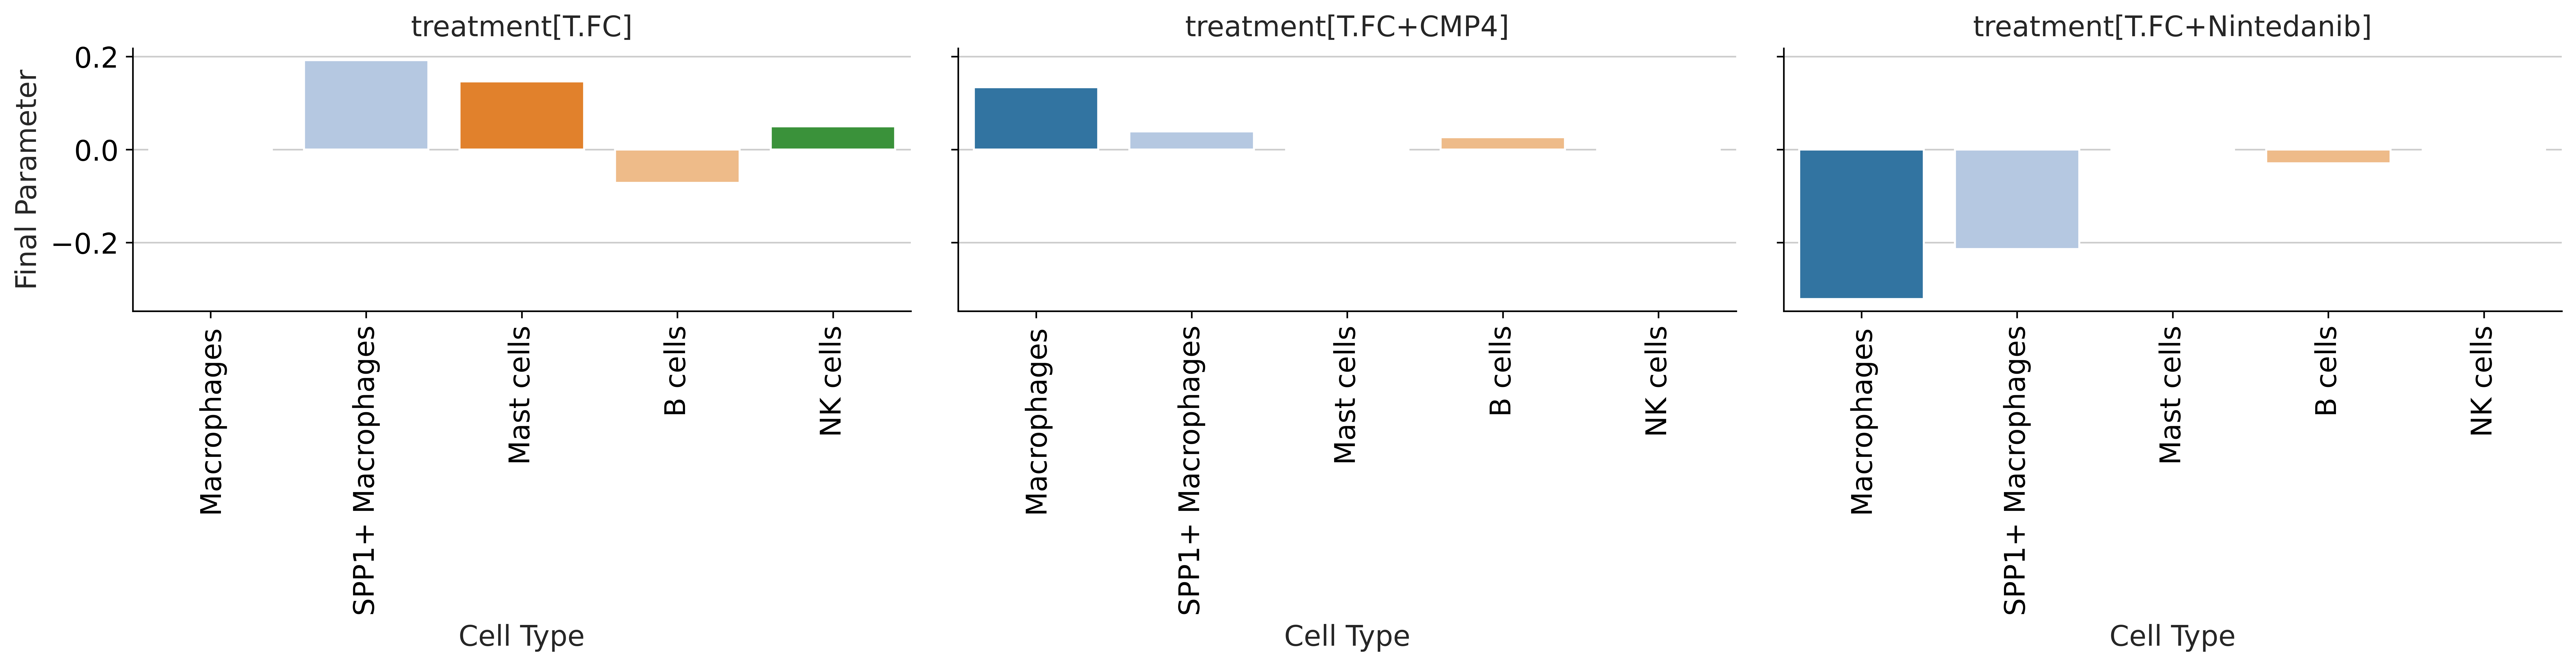

In [42]:
sccoda_model.plot_effects_barplot(
    sccoda_data, modality_key="coda", parameter="Final Parameter"
)

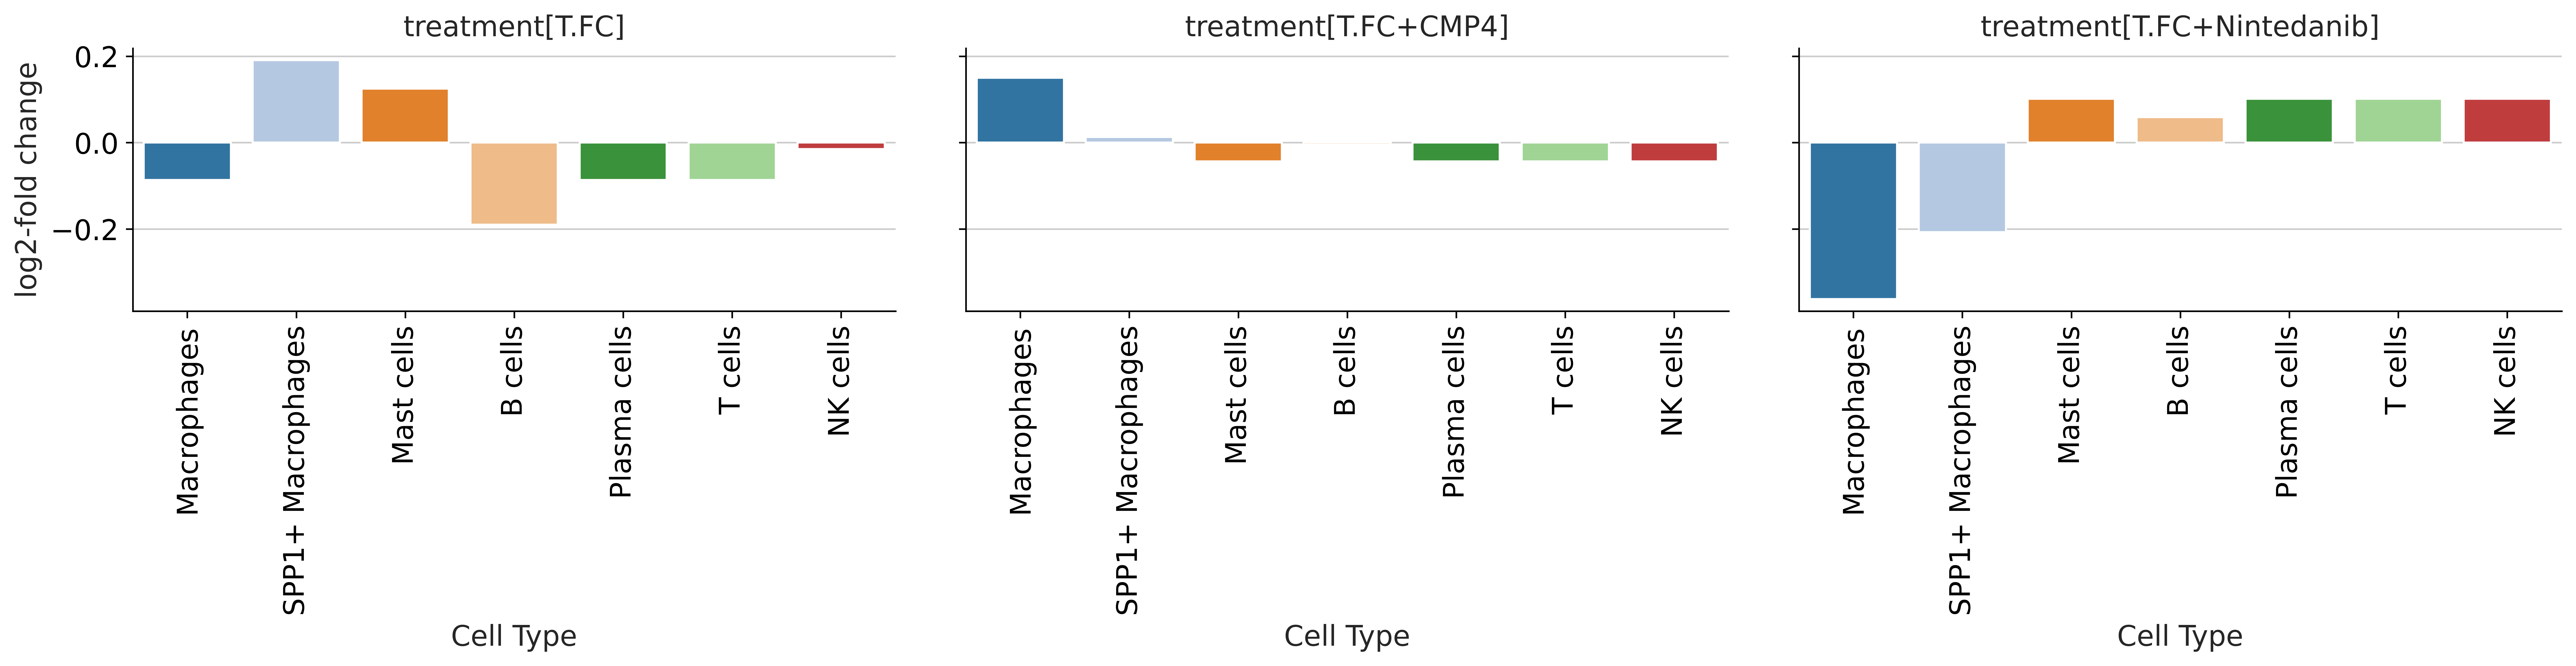

In [43]:
sccoda_model.plot_effects_barplot(
    sccoda_data, modality_key="coda", parameter="log2-fold change"
)
plt.savefig("figures/final_parameter_boxplot_log2fc.png", bbox_inches="tight")

## MILO

In [44]:
milo = pt.tl.Milo()
milo_data = milo.load(adata)

In [45]:
milo.make_nhoods(milo_data["rna"], prop=0.1)

In [46]:
print(f"Number of neighborhoods: {milo_data['rna'].obsm['nhoods'].shape[1]}")

Number of neighborhoods: 1750


Text(0, 0.5, '# nhoods')

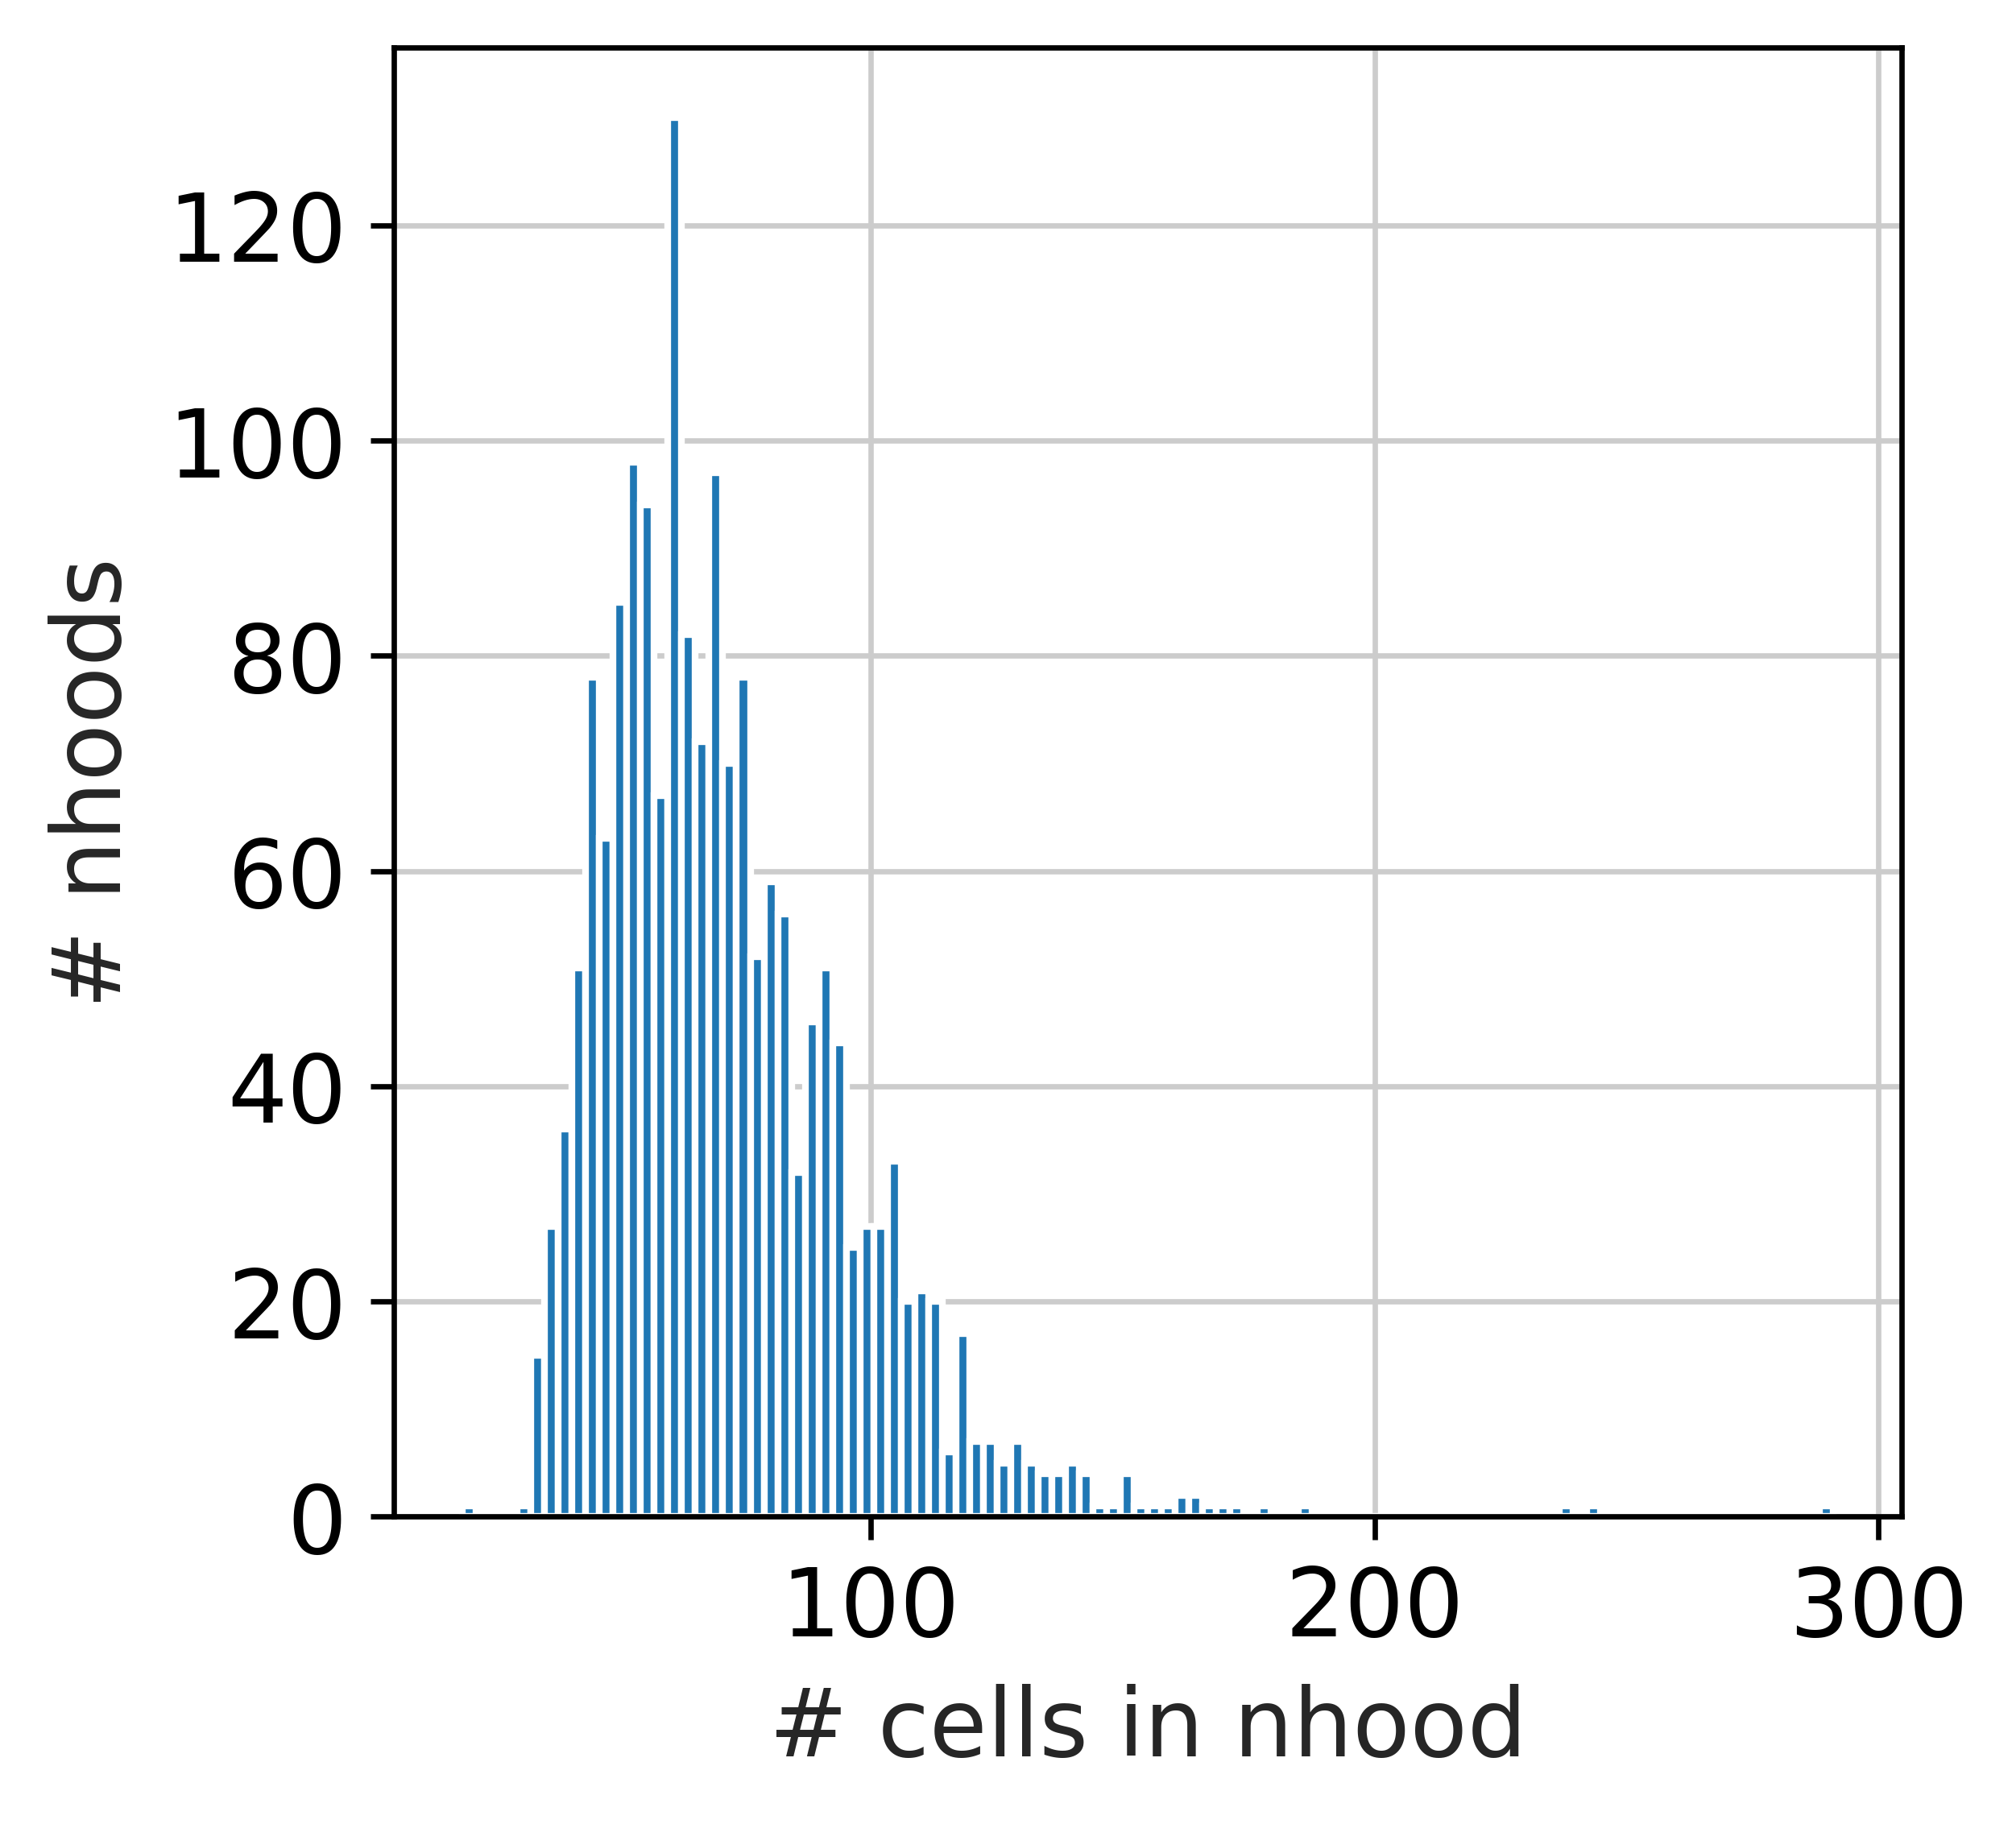

In [47]:
nhood_size = np.array(milo_data["rna"].obsm["nhoods"].sum(0)).ravel()
plt.hist(nhood_size, bins=100)
plt.xlabel("# cells in nhood")
plt.ylabel("# nhoods")

In [53]:
mdata = milo.count_nhoods(milo_data, sample_col="sample")

In [54]:
milo.da_nhoods(mdata, design="~treatment")

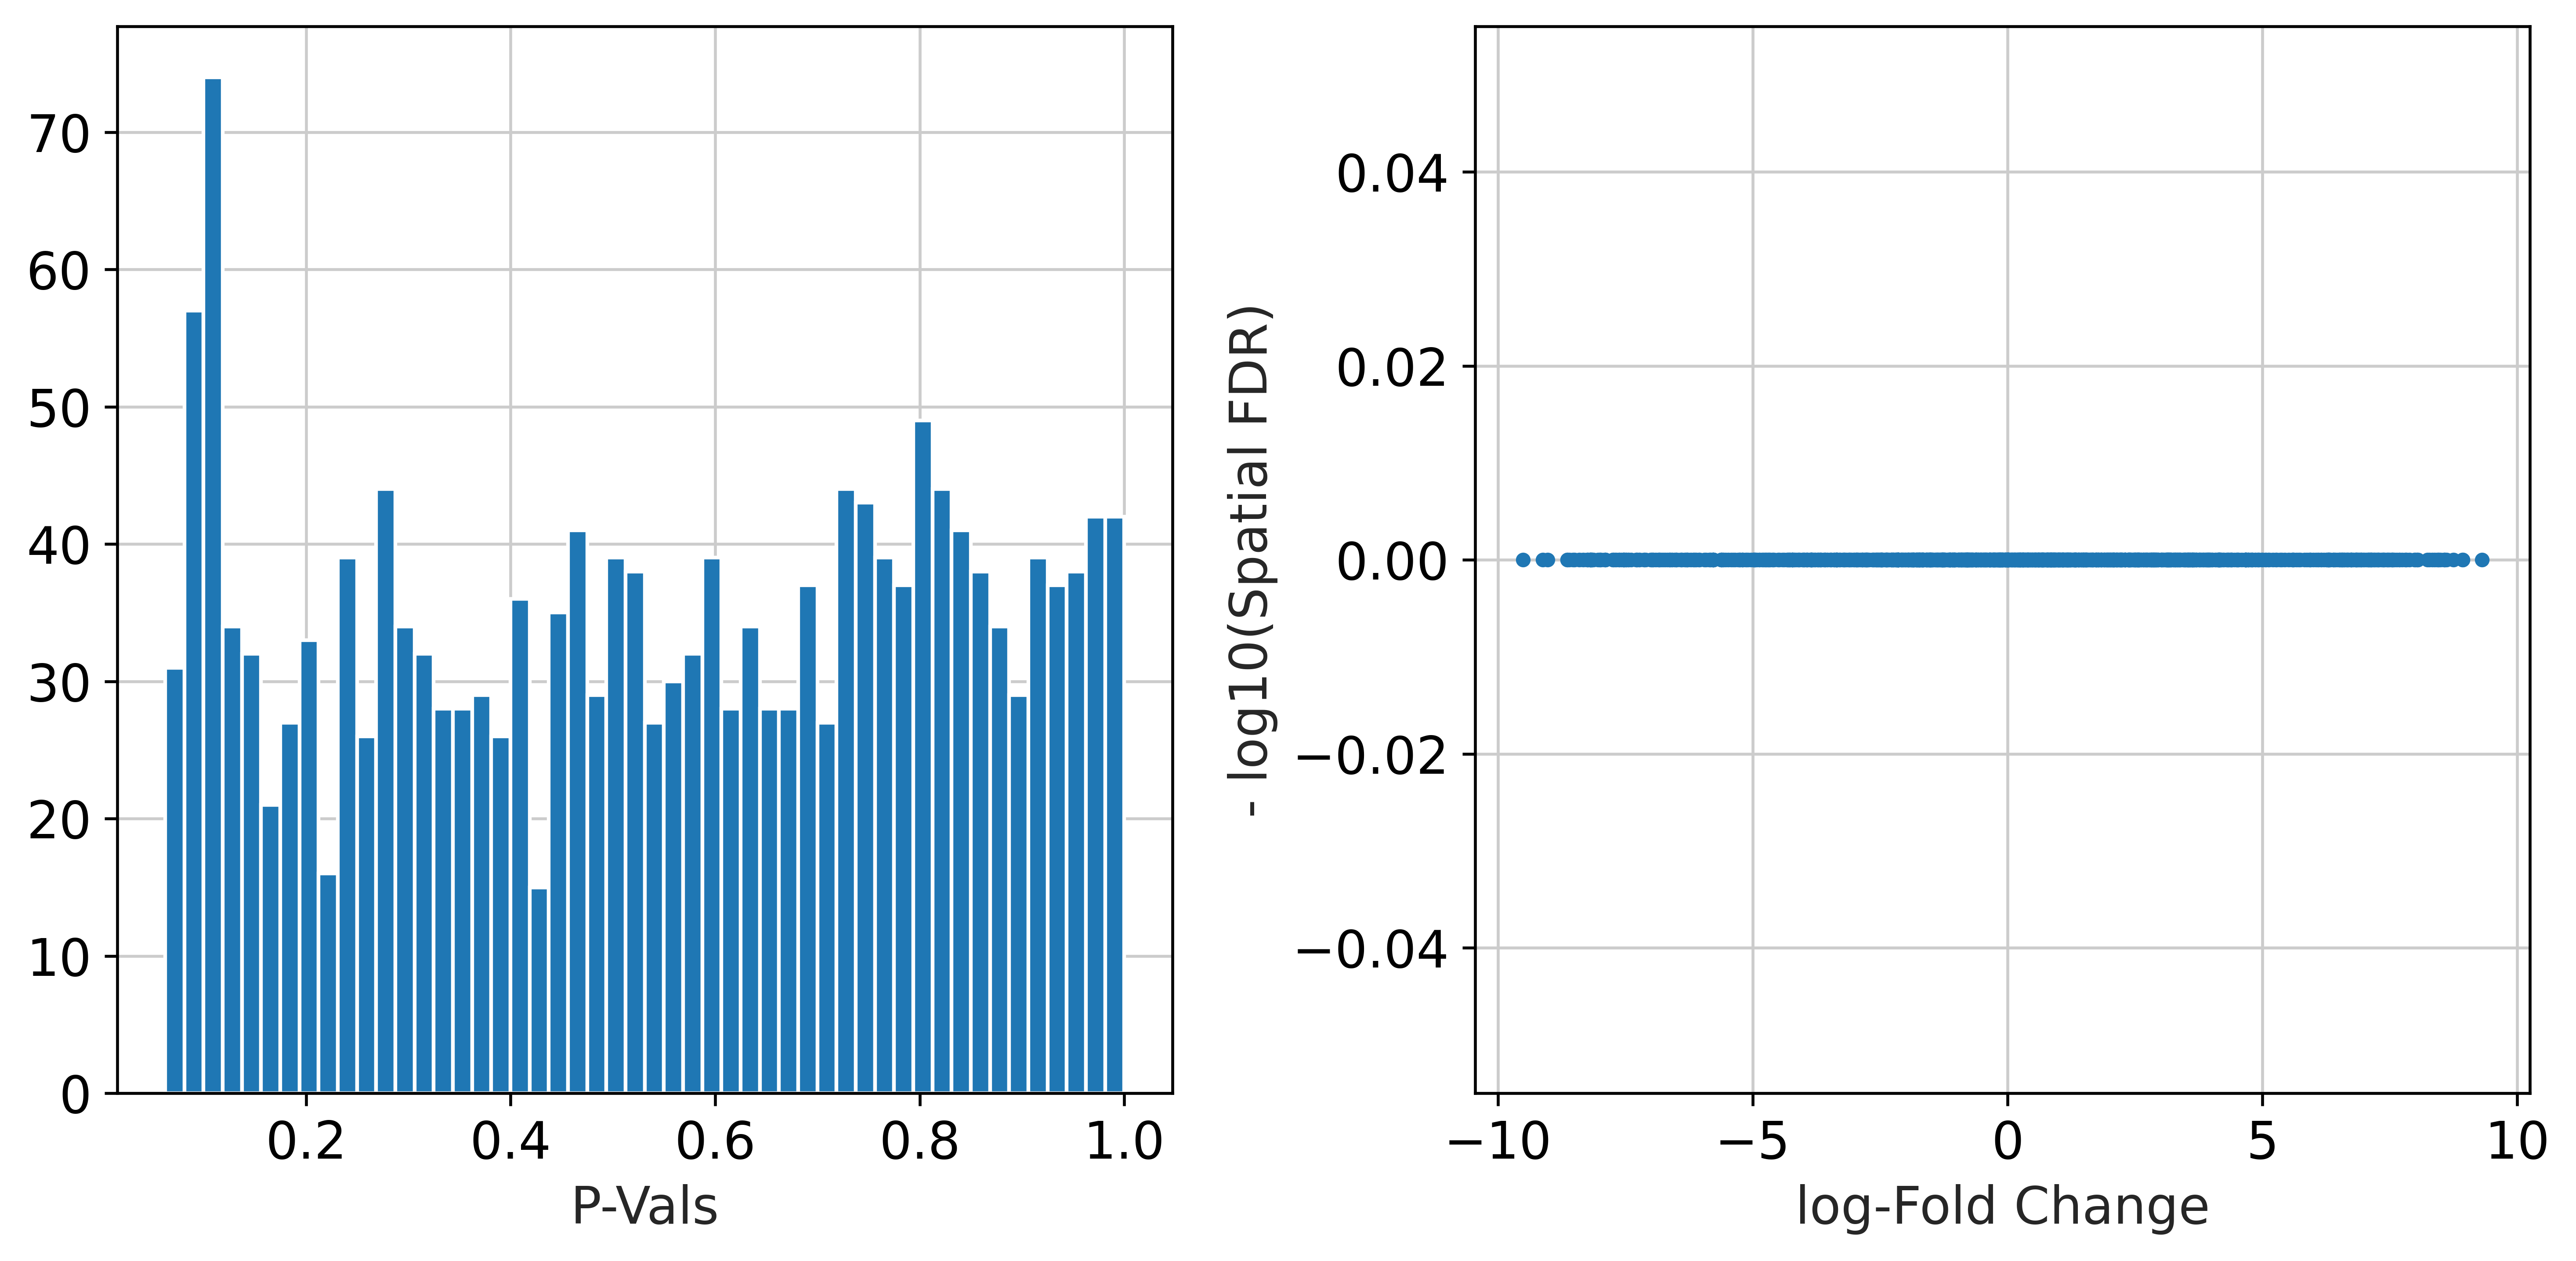

In [55]:
plt.rcParams["figure.figsize"] = [10, 5]
plt.subplot(1, 2, 1)
plt.hist(mdata["milo"].var.PValue, bins=50)
plt.xlabel("P-Vals")
plt.subplot(1, 2, 2)
plt.plot(mdata["milo"].var.logFC, -np.log10(mdata["milo"].var.SpatialFDR), ".")
plt.xlabel("log-Fold Change")
plt.ylabel("- log10(Spatial FDR)")
plt.tight_layout()

In [56]:
milo.build_nhood_graph(mdata)

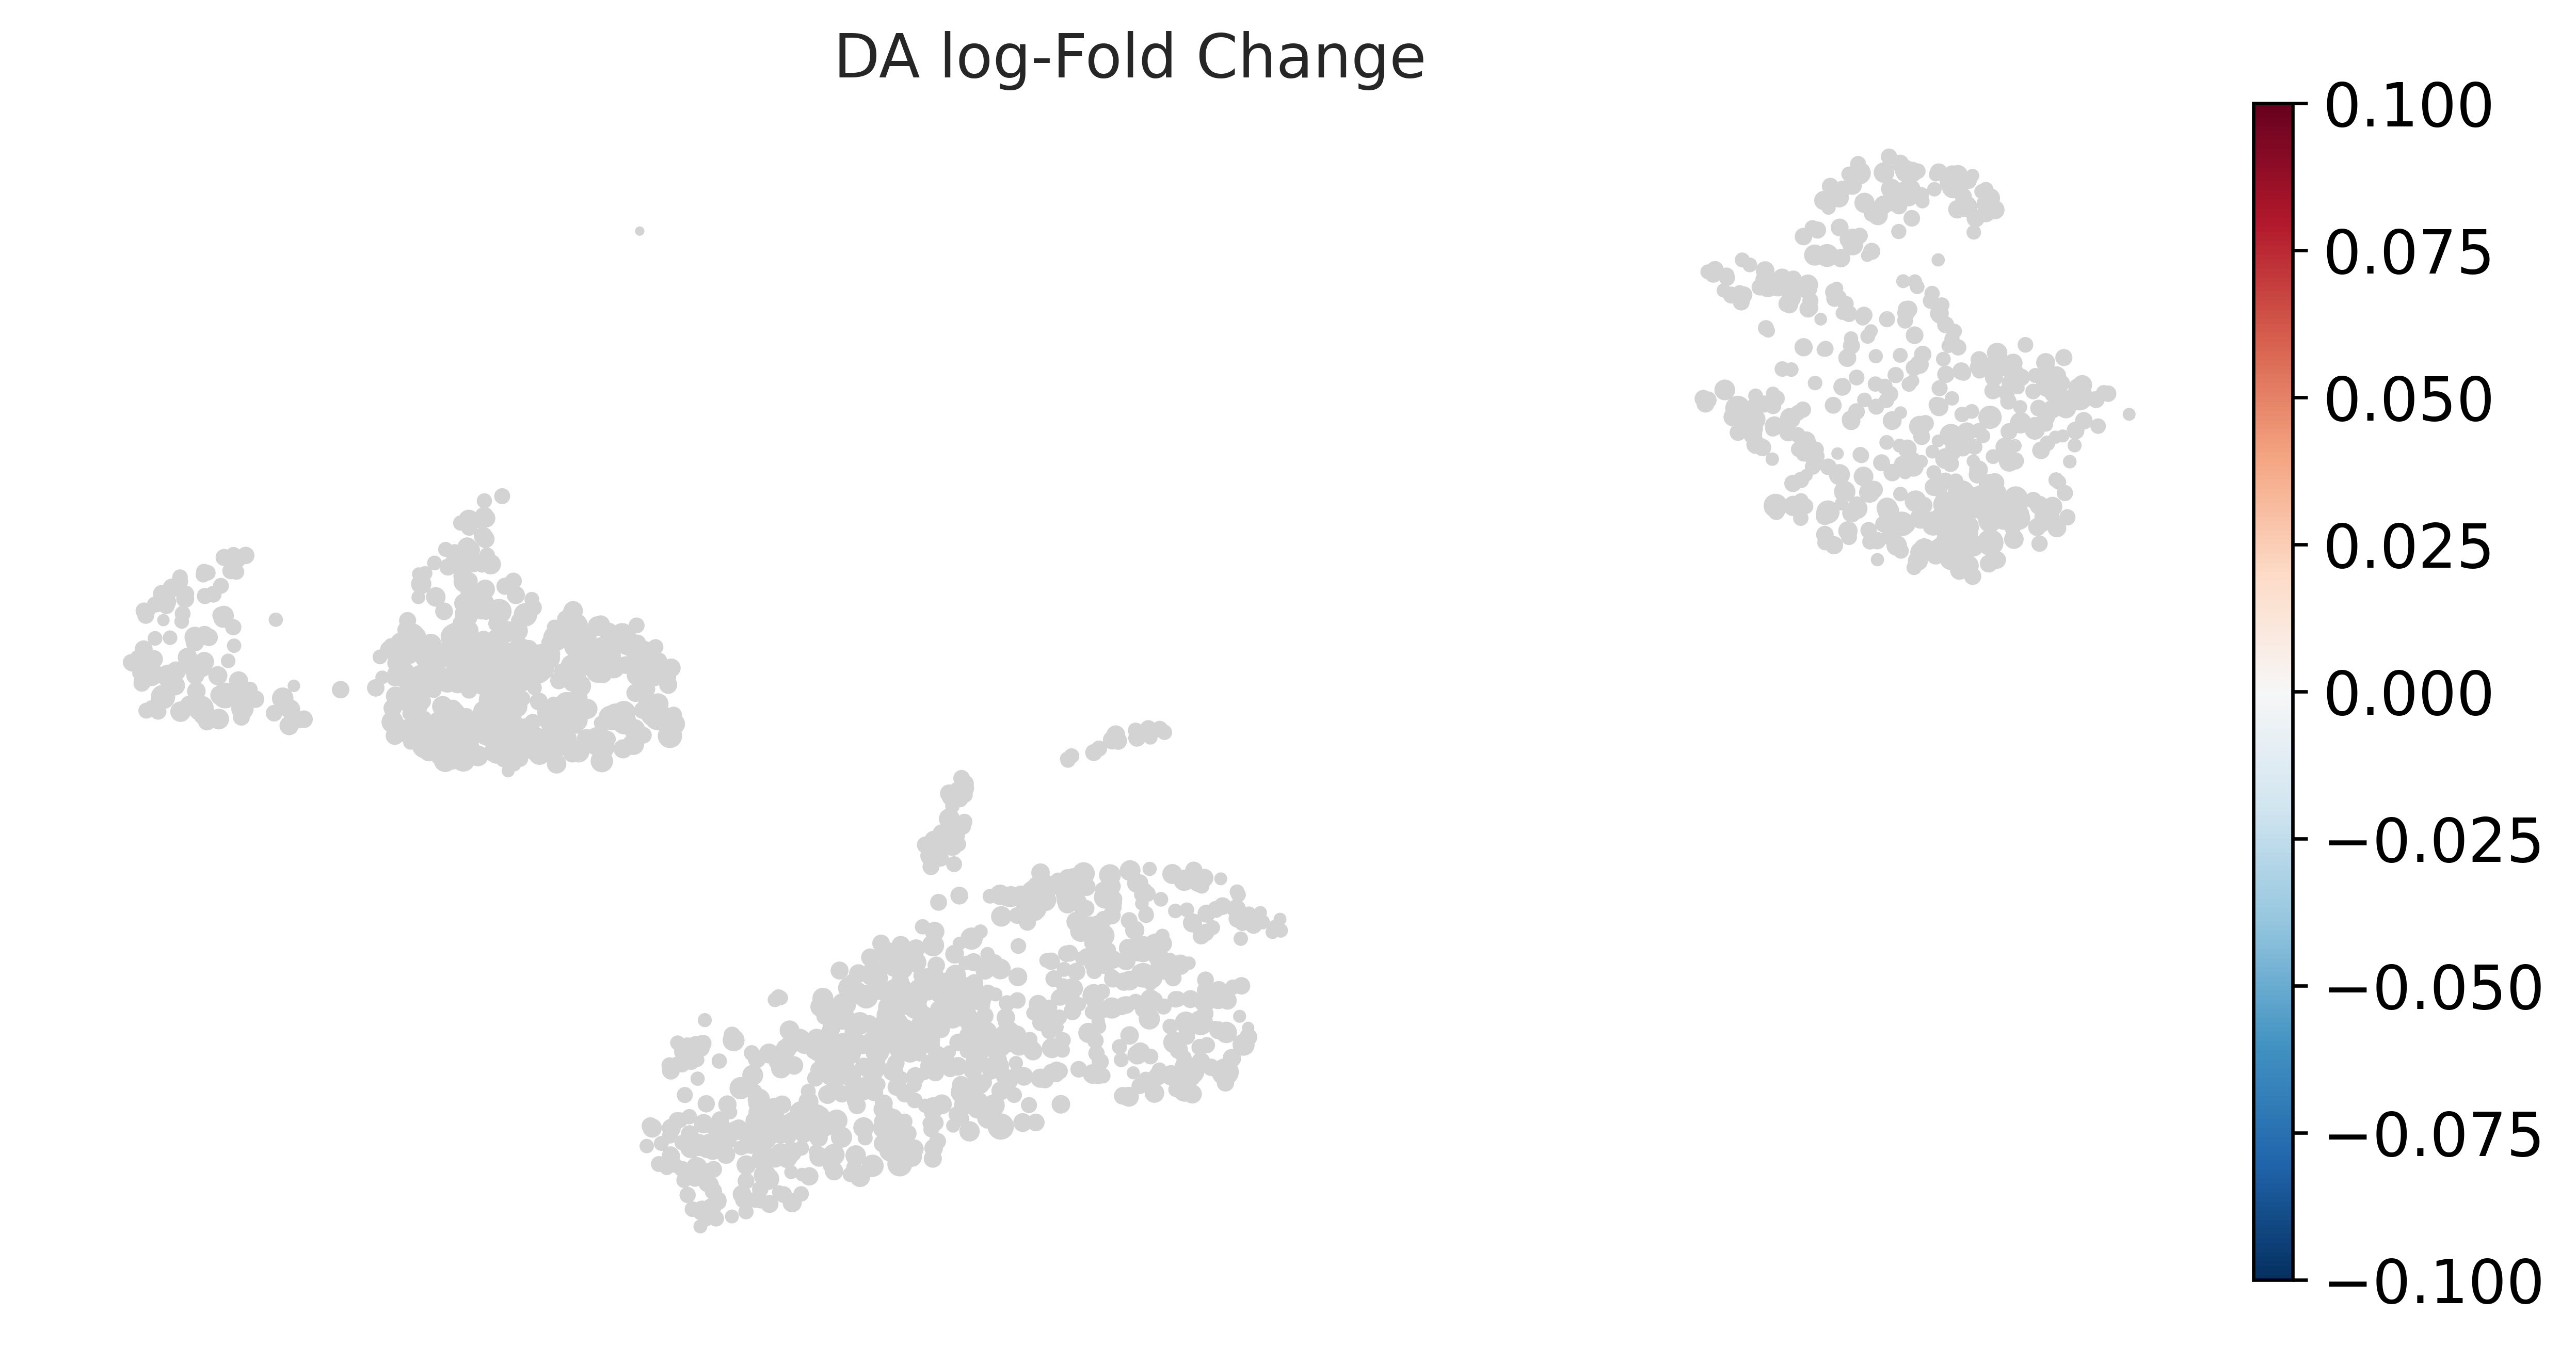

<Figure size 3000x1500 with 0 Axes>

In [57]:
milo.plot_nhood_graph(
    mdata,
    alpha=0.5,
    min_size=1,
)
plt.savefig("figures/milo_da_umap.png", bbox_inches="tight")